<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/dataset_distribution_in_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/lovnishverma/datasets/refs/heads/main/imbalanced_dataset.csv')

In [85]:
df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,1.108936,1.540492,0.493516,-0.529740,0.982175,1.177544,1.623025,1.357325,0.966041,-0.504924,0
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,1.476534,0.548523,-0.115420,-0.875408,1.301216,0.410295,1.171878,-1.034471,-1.654176,1.344601,0
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0


In [86]:
df.describe()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.055594,-0.004384,-0.072376,-0.935290,0.863523,0.885335,0.531919,0.017115,-0.058077,0.747511,0.104000
std,1.596527,1.528357,1.024196,1.141191,1.146616,1.689768,2.195171,1.029048,1.046402,2.038224,0.305413
min,-4.661168,-4.466020,-3.031194,-4.416512,-3.065364,-4.341477,-7.298063,-3.254479,-3.582063,-8.102614,0.000000
25%,-1.112206,-1.189908,-0.779532,-1.675446,0.246942,-0.204852,-0.887422,-0.676648,-0.744499,-0.249535,0.000000
50%,0.170678,-0.167338,-0.041891,-1.007538,0.878308,0.835578,0.579648,0.025772,-0.081367,1.032990,0.000000
75%,1.180167,1.066860,0.644444,-0.335819,1.533489,2.036998,2.037977,0.679153,0.659029,1.990229,0.000000
max,4.724046,4.837464,3.276399,5.442019,5.943272,7.089706,7.456970,3.089890,2.986329,7.933944,1.000000


# You can check the class distribution of the target column in several ways:

**1. Value Counts (most common)**

In [87]:
print(df['Target'].value_counts())

Target
0    896
1    104
Name: count, dtype: int64


This will show how many samples belong to each class.

**If you want percentages too:**

In [88]:
print(df['Target'].value_counts(normalize=True) * 100)

Target
0    89.6
1    10.4
Name: proportion, dtype: float64


**2. Quick Summary with groupby**

In [89]:
print(df.groupby('Target').size())

Target
0    896
1    104
dtype: int64


**3. Visualization with Matplotlib**

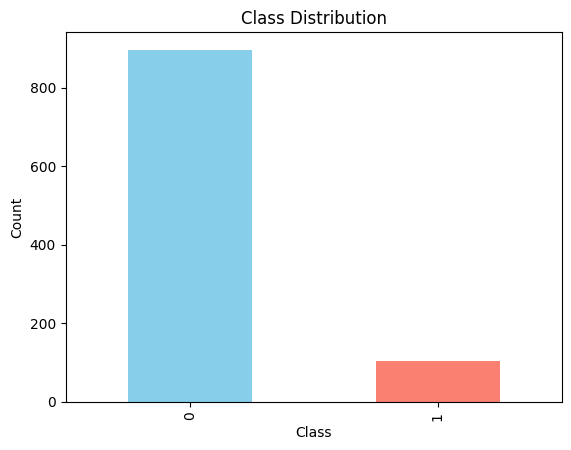

In [90]:
import matplotlib.pyplot as plt

df['Target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**4. Visualization with Seaborn**

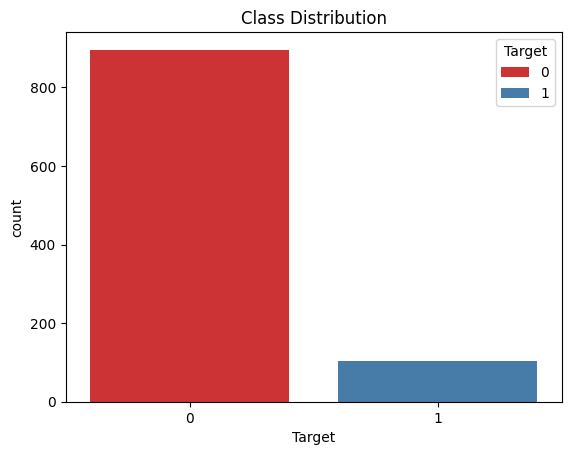

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(
    x="Target",
    data=df,
    hue="Target",     # explicitly use Target as hue
    palette="Set1"
)
plt.title("Class Distribution")
plt.show()




---



# Balancing an imbalanced dataset can be done in different ways depending on whether you want to add more data, remove data, or synthetically generate samples.

**1. Random Oversampling**

Duplicate samples from the minority class until both classes have similar counts.

In [92]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = df[df['Target'] == 0]
minority = df[df['Target'] == 1]

# Upsample minority
minority_upsampled = resample(minority,
                              replace=True,     # sample with replacement
                              n_samples=len(majority), # match majority count
                              random_state=42)

# Combine
df_balanced_over = pd.concat([majority, minority_upsampled])
print(df_balanced_over['Target'].value_counts())

Target
0    896
1    896
Name: count, dtype: int64


**2. Random Undersampling**

Remove samples from the majority class until it matches the minority.

In [93]:
# Downsample majority
majority_downsampled = resample(majority,
                                replace=False,    # no replacement
                                n_samples=len(minority), # match minority count
                                random_state=42)

# Combine
df_balanced_under = pd.concat([majority_downsampled, minority])
print(df_balanced_under['Target'].value_counts())

Target
0    104
1    104
Name: count, dtype: int64


**3. SMOTE (Synthetic Minority Over-sampling Technique)**

Generates new synthetic samples instead of duplicating existing ones.

In [94]:
from imblearn.over_sampling import SMOTE

X = df.drop('Target', axis=1)
y = df['Target']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(y_res.value_counts())

Target
0    896
1    896
Name: count, dtype: int64


# Saving Balanced dataset as CSV

In [95]:
import pandas as pd

# Combine back into one DataFrame
balanced_df = pd.DataFrame(X_res, columns=df.drop('Target', axis=1).columns)
balanced_df['Target'] = y_res

# Save to CSV
balanced_df.to_csv("balanced_dataset_smote.csv", index=False)

print("Balanced dataset saved as balanced_dataset_smote.csv")


Balanced dataset saved as balanced_dataset_smote.csv


In [96]:
df_balanced = pd.read_csv('/content/balanced_dataset_smote.csv')
df_balanced['Target'].value_counts()

,count
Target,
0,896
1,896


**another option is:**

**4. Class Weights (Model-level Fix)**

Instead of changing the dataset, you can tell your model to pay more attention to minority samples.
For example, in sklearn:

In [97]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X, y)

LogisticRegression(class_weight='balanced', random_state=42)

**Tip:**

Use oversampling or SMOTE when you have enough computational power.

Use undersampling when dataset is huge.

Use class weights when you don’t want to touch the dataset.



---



**Note:** **stratify=y** is used when splitting datasets into train/test (or train/val) sets.

If your dataset is imbalanced, a normal train_test_split might accidentally create a training set with fewer minority samples, making imbalance worse.
Using stratify=y ensures the class distribution is preserved in both train and test sets.

In [98]:
df['Target'].value_counts()

,count
Target,
0,896
1,104


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create a toy dataset with clearer minority class
data = {
    "Feature1": range(100),
    "Target": [0]*80 + [1]*20  # 80% vs 20%
}
df_demo = pd.DataFrame(data)

X = df_demo.drop("Target", axis=1)
y = df_demo["Target"]

print("Original distribution:\n", y.value_counts(normalize=True))

# Without stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nWithout stratify:")
print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))

# With stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("\nWith stratify:")
print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))


Original distribution:
 Target
0    0.8
1    0.2
Name: proportion, dtype: float64

Without stratify:
Train: Target
0    0.7875
1    0.2125
Name: proportion, dtype: float64
Test: Target
0    0.85
1    0.15
Name: proportion, dtype: float64

With stratify:
Train: Target
0    0.8
1    0.2
Name: proportion, dtype: float64
Test: Target
0    0.8
1    0.2
Name: proportion, dtype: float64


Without stratify=y, you risk losing minority class samples in the smaller split.

With stratify=y, the proportion of classes in train and test matches the original dataset.